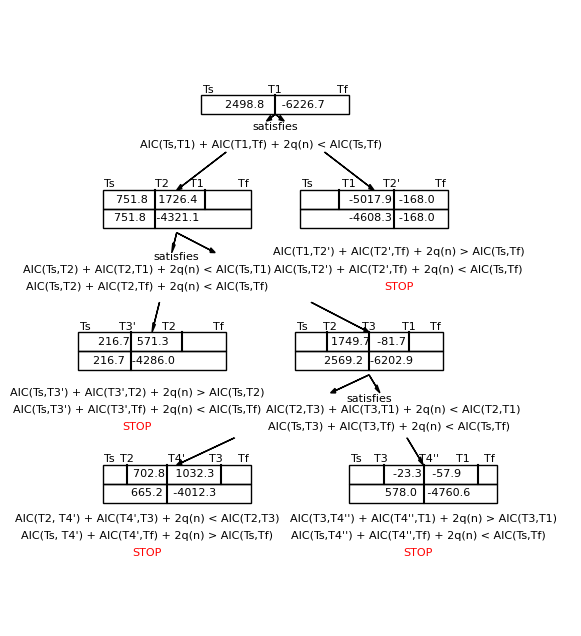

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Rectangle
plt.figure(figsize=(7, 8))


# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions
G.add_node("S1", pos=(0, 3))
G.add_node("S2", pos=(-2, 2))
G.add_node("S3", pos=(2, 2))
G.add_node("S4", pos=(-2.5, 0.5))
G.add_node("S5", pos=(1.9, 0.5))
G.add_node("S6", pos=(-2, -0.9))  # New node below S5
G.add_node("S7", pos=(3, -0.9))  # Additional new node next to S6

# Add edges
G.add_edge("S1", "S2")
G.add_edge("S1", "S3")
G.add_edge("S2", "S4")
G.add_edge("S2", "S5")
G.add_edge("S5", "S6")  # New edge to the new node
G.add_edge("S5", "S7")  # New edge to the additional new node

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Function to draw arrows with gaps for text
def draw_arrow_with_gap(start, end, gap_start, gap_end, color='k'):
    arrow_vector = [end[0] - start[0], end[1] - start[1]]
    total_length = ((arrow_vector[0]**2 + arrow_vector[1]**2) ** 0.5)
    gap_length = total_length * (gap_end - gap_start)
    gap_start_pos = [start[0] + arrow_vector[0] * gap_start, start[1] + arrow_vector[1] * gap_start]
    gap_end_pos = [start[0] + arrow_vector[0] * gap_end, start[1] + arrow_vector[1] * gap_end]

    # Draw the arrow in two segments, before and after the gap
    plt.arrow(start[0], start[1], gap_start_pos[0] - start[0], gap_start_pos[1] - start[1],
              length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)
    plt.arrow(gap_end_pos[0], gap_end_pos[1], end[0] - gap_end_pos[0], end[1] - gap_end_pos[1],
              length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)

# Draw edges with gaps for text
for (start, end) in G.edges():
    start_pos = pos[start]
    end_pos = pos[end]
    if start == "S1":
        start_pos = (start_pos[0], start_pos[1]-0.1)  # Adjust start position to the bottom of the box
        end_pos = (end_pos[0], end_pos[1] + 0.1)  # Adjust end position to the top of the box
        draw_arrow_with_gap(start_pos, end_pos, 0.09, 0.5)
    else:
        start_pos = (start_pos[0], start_pos[1] - 0.35)  # Adjust start position to the bottom of the box
        end_pos = (end_pos[0], end_pos[1] + 0.1)  # Adjust end position to the top of the box
        draw_arrow_with_gap(start_pos, end_pos, 0.2, 0.7)

# Draw custom nodes with boxes split by a vertical line
ax = plt.gca()

def draw_custom_node(ax, position, labels, label_positions, aic_value, extra_text, extra_text_pos, vertical_lines_main=None, vertical_lines_extra=None, is_top_node=False):
    if vertical_lines_main is None:
        vertical_lines_main = []
    if vertical_lines_extra is None:
        vertical_lines_extra = []

    x, y = position
    width, height = 3, 0.2
    # Draw the main box
    main_box = Rectangle((x - width / 2, y - height / 2), width, height, fill=None, edgecolor='black')
    ax.add_patch(main_box)

    # Add text inside the main box
    for label, (dx, dy) in zip(labels, label_positions):
        ax.annotate(label, (x + dx, y + dy), ha='center', va='center', fontsize=8)

    if is_top_node:
        # Draw the vertical lines at the specified positions for the main box
        for line_pos in vertical_lines_main:
            ax.plot([x + line_pos-0.1, x + line_pos-0.1], [y - height / 2, y + height / 2], color='black')
        # Adjust the position of extra_text for the top node
        ax.text(x, y, extra_text, ha='center', va='center', fontsize=8)
        # Add the AIC value slightly below the main box
        ax.annotate(f"{aic_value}", (x, y - height / 1.5 - 0.1), ha='center', va='center', fontsize=8)
    else:
        # Draw the extra box below the main box for other nodes
        extra_box = Rectangle((x - width / 2, y - height / 2 - height), width, height, fill=None, edgecolor='black')
        ax.add_patch(extra_box)
        for line_pos in vertical_lines_main:
            ax.plot([x + line_pos+0.1, x + line_pos+0.1], [y - height / 2, y + height / 2], color='black')

        for line_pos in vertical_lines_extra:
            ax.plot([x + line_pos-0.1, x + line_pos-0.1], [y - height / 2 - height, y + height / 2], color='black')

        # Split extra_text into two lines
        extra_text_lines = extra_text.split('    ')  # Assuming '   ' is the delimiter for two lines

        # Add the extra text inside the extra box
        ax.text(x + extra_text_pos[0], y + extra_text_pos[1] - height / 2 - height / 2+0.2, extra_text_lines[0], ha='center', va='center', fontsize=8)
        ax.text(x + extra_text_pos[0], y + extra_text_pos[1] - height / 2 - height / 2 , extra_text_lines[1], ha='center', va='center', fontsize=8)
        ax.annotate(f"{aic_value}", (x, y - height / 1.5-0.47), ha='center', va='center', fontsize=8)

# Custom labels and positions for each node
node_labels = {
    "S1": (["Ts", "T1", "Tf"], [(-1.36, 0.16), (0.0, 0.16), (1.35, 0.16)], "satisfies", "2498.8     -6226.7", [0.1], [-0.1], [0, -0.4]),
    "S2": (["Ts", "T2", "T1", "Tf"], [(-1.36, 0.16), (-0.3, 0.16), (0.4, 0.16), (1.35, 0.16)], "satisfies", "751.8   1726.4    751.8   -4321.1", [0.47], [-0.34], [-0.4, 0]),
    "S3": (["Ts", "T1", "T2\'", "Tf"], [(-1.36, 0.16), (-0.5, 0.16), (0.35, 0.16), (1.35, 0.16)], "", "-5017.9  -168.0    -4608.3  -168.0", [-0.81], [0.5], [0.36, 0]),
    "S4": (["Ts", "T3\'", "T2", "Tf"], [(-1.36, 0.16), (-0.5, 0.16), (0.35, 0.16), (1.35, 0.16)], "", "216.7  571.3    216.7  -4286.0", [0.5], [-0.32], [-0.37, 0]),
    "S5": (["Ts","T2", "T3", "T1", "Tf"], [(-1.36, 0.16), (-0.8, 0.16), (0.0, 0.16), (0.8, 0.16), (1.35, 0.16)], "satisfies", "1749.7  -81.7    2569.2  -6202.9", [-0.96, 0.7], [0.09], [-0.02, 0]),
    "S6": (["Ts", "T2", "T4\'", "T3", "Tf"], [(-1.36, 0.16), (-1, 0.16),(0.0, 0.16), (0.8, 0.16), (1.35, 0.16)], "", "702.8   1032.3    665.2   -4012.3", [-1.1, 0.8], [-0.1], [-0.065, 0]),
    "S7": (["Ts", "T3", "T4\''", "T1", "Tf"], [(-1.36, 0.16), (-0.86, 0.16), (0.12, 0.16), (0.8, 0.16), (1.35, 0.16)],"", "-23.3   -57.9    578.0   -4760.6", [-0.9, 1], [0.12], [0.08, 0])
}

for node, position in pos.items():
    labels, label_positions, aic_value, extra_text, vertical_lines_main, vertical_lines_extra, extra_text_pos = node_labels[node]
    draw_custom_node(ax, position, labels, label_positions, aic_value, extra_text, extra_text_pos, vertical_lines_main, vertical_lines_extra, is_top_node=(node == "S1"))

# Draw additional annotations for conditions
plt.annotate('AIC(Ts,T1) + AIC(T1,Tf) + 2q(n) < AIC(Ts,Tf)', xy=(-0.3, 2.54), ha='center', fontsize=8)
plt.annotate('AIC(Ts,T2) + AIC(T2,T1) + 2q(n) < AIC(Ts,T1)', xy=(-2.6, 1.23), ha='center', fontsize=8)
plt.annotate('AIC(Ts,T2) + AIC(T2,Tf) + 2q(n) < AIC(Ts,Tf)', xy=(-2.6, 1.05), ha='center', fontsize=8)
plt.annotate('AIC(T1,T2\') + AIC(T2\',Tf) + 2q(n) > AIC(Ts,Tf)', xy=(2.5, 1.41), ha='center', fontsize=8)
plt.annotate('AIC(Ts,T2\') + AIC(T2\',Tf) + 2q(n) < AIC(Ts,Tf)', xy=(2.5, 1.23), ha='center', fontsize=8)

plt.annotate('STOP', xy=(2.5, 1.05), ha='center', fontsize=8, color='red')

plt.annotate('AIC(Ts,T3\') + AIC(T3\',T2) + 2q(n) > AIC(Ts,T2)', xy=(-2.8, -0.07), ha='center', fontsize=8)
plt.annotate('AIC(Ts,T3\') + AIC(T3\',Tf) + 2q(n) < AIC(Ts,Tf)', xy=(-2.8, -0.25), ha='center', fontsize=8)
plt.annotate('STOP', xy=(-2.8, -0.43), ha='center', fontsize=8, color='red')

plt.annotate('AIC(T2,T3) + AIC(T3,T1) + 2q(n) < AIC(T2,T1)', xy=(2.4, -0.25), ha='center', fontsize=8)
plt.annotate('AIC(Ts,T3) + AIC(T3,Tf) + 2q(n) < AIC(Ts,Tf)', xy=(2.3, -0.43), ha='center', fontsize=8)

plt.annotate('AIC(T2, T4\') + AIC(T4\',T3) + 2q(n) < AIC(T2,T3)', xy=(-2.6, -1.40), ha='center', fontsize=8)
plt.annotate('AIC(Ts, T4\') + AIC(T4\',Tf) + 2q(n) > AIC(Ts,Tf)', xy=(-2.6, -1.58), ha='center', fontsize=8)

plt.annotate('STOP', xy=(-2.6, -1.76), ha='center', fontsize=8, color="red")

plt.annotate('AIC(T3,T4\'\') + AIC(T4\'\',T1) + 2q(n) > AIC(T3,T1)', xy=(3, -1.40), ha='center', fontsize=8)
plt.annotate('AIC(Ts,T4\'\') + AIC(T4\'\',Tf) + 2q(n) < AIC(Ts,Tf)', xy=(2.9, -1.58), ha='center', fontsize=8)

plt.annotate('STOP', xy=(2.9, -1.76), ha='center', fontsize=8, color="red")
plt.xlim(-5, 6)
plt.ylim(-2.5, 4)

plt.axis('off')
plt.savefig('graph_plot.png', dpi=300, bbox_inches='tight')

plt.show()
from google.colab import files

files.download('graph_plot.png')
